In [2]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.split_to_nix import split_currency_columns
from scripts.rename import rename_and_add_id
from scripts.convert_ds_to_date import convert_ds_to_date
from scripts.plot_time_series import plot_time_series
from scripts.aggregate_monthly_avg import aggregate_monthly_avg
from scripts.to_float import convert_x_to_float

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("../data/soja/soja.csv")

In [5]:
df.head(10)

,Data,À vista R$,À vista US$
0,13/03/2006,"27,66","12,96"
1,14/03/2006,"27,45","12,91"
2,15/03/2006,"27,58",13
3,16/03/2006,"26,97","12,78"
4,17/03/2006,"26,96","12,68"
5,20/03/2006,"27,36","12,73"
6,21/03/2006,"27,55","12,67"
7,22/03/2006,"27,84","12,94"
8,23/03/2006,"27,82","12,87"
9,24/03/2006,"27,91","12,96"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         4723 non-null   object
 1   À vista R$   4723 non-null   object
 2   À vista US$  4723 non-null   object
dtypes: object(3)
memory usage: 110.8+ KB


In [7]:
df_brl, df_usd = split_currency_columns(df)

In [8]:
df_brl.head(10)

,Data,À vista R$
0,13/03/2006,"27,66"
1,14/03/2006,"27,45"
2,15/03/2006,"27,58"
3,16/03/2006,"26,97"
4,17/03/2006,"26,96"
5,20/03/2006,"27,36"
6,21/03/2006,"27,55"
7,22/03/2006,"27,84"
8,23/03/2006,"27,82"
9,24/03/2006,"27,91"


In [9]:
df_usd.head(10)

,Data,À vista US$
0,13/03/2006,"12,96"
1,14/03/2006,"12,91"
2,15/03/2006,13
3,16/03/2006,"12,78"
4,17/03/2006,"12,68"
5,20/03/2006,"12,73"
6,21/03/2006,"12,67"
7,22/03/2006,"12,94"
8,23/03/2006,"12,87"
9,24/03/2006,"12,96"


In [10]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'X'
}

cols_dict_usd = {
    'Data': 'ds',
    'À vista US$': 'X'
}

In [11]:
unique_id = 'SOJA'
df_brl = rename_and_add_id(df_brl, cols_dict_brl, unique_id)
df_usd = rename_and_add_id(df_usd, cols_dict_usd, unique_id)

In [12]:
df_brl.head(10)

,ds,X,unique_id
0,13/03/2006,"27,66",SOJA
1,14/03/2006,"27,45",SOJA
2,15/03/2006,"27,58",SOJA
3,16/03/2006,"26,97",SOJA
4,17/03/2006,"26,96",SOJA
5,20/03/2006,"27,36",SOJA
6,21/03/2006,"27,55",SOJA
7,22/03/2006,"27,84",SOJA
8,23/03/2006,"27,82",SOJA
9,24/03/2006,"27,91",SOJA


In [13]:
df_usd.head(10)

,ds,X,unique_id
0,13/03/2006,"12,96",SOJA
1,14/03/2006,"12,91",SOJA
2,15/03/2006,13,SOJA
3,16/03/2006,"12,78",SOJA
4,17/03/2006,"12,68",SOJA
5,20/03/2006,"12,73",SOJA
6,21/03/2006,"12,67",SOJA
7,22/03/2006,"12,94",SOJA
8,23/03/2006,"12,87",SOJA
9,24/03/2006,"12,96",SOJA


In [14]:
df_brl = convert_ds_to_date(df_brl)
df_usd = convert_ds_to_date(df_usd)

df_brl = convert_x_to_float(df_brl)
df_usd = convert_x_to_float(df_usd)

In [15]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         4723 non-null   datetime64[ns]
 1   X          4723 non-null   float64       
 2   unique_id  4723 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [16]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         4723 non-null   datetime64[ns]
 1   X          4723 non-null   float64       
 2   unique_id  4723 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [17]:
df_brl = aggregate_monthly_avg(df_brl)
df_usd = aggregate_monthly_avg(df_usd)

In [18]:
df_brl.head(10)

,ds,X,unique_id
0,2006-03-01,27.789333,SOJA
1,2006-04-01,27.020556,SOJA
2,2006-05-01,28.682727,SOJA
3,2006-06-01,29.411579,SOJA
4,2006-07-01,29.599524,SOJA
5,2006-08-01,28.912609,SOJA
6,2006-09-01,29.099000,SOJA
7,2006-10-01,32.126190,SOJA
8,2006-11-01,34.371500,SOJA
9,2006-12-01,33.314211,SOJA


In [19]:
df_usd.head(10)

,ds,X,unique_id
0,2006-03-01,12.882000,SOJA
1,2006-04-01,12.703333,SOJA
2,2006-05-01,13.150909,SOJA
3,2006-06-01,13.104211,SOJA
4,2006-07-01,13.514286,SOJA
5,2006-08-01,13.404348,SOJA
6,2006-09-01,13.420000,SOJA
7,2006-10-01,14.961905,SOJA
8,2006-11-01,15.923500,SOJA
9,2006-12-01,15.497368,SOJA


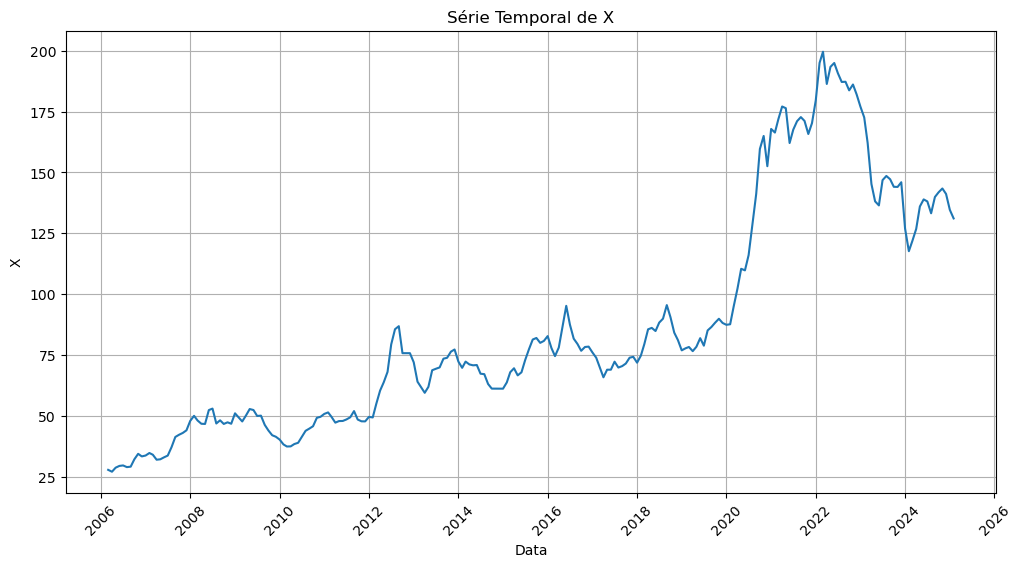

In [20]:
plot_time_series(df_brl, 'X')

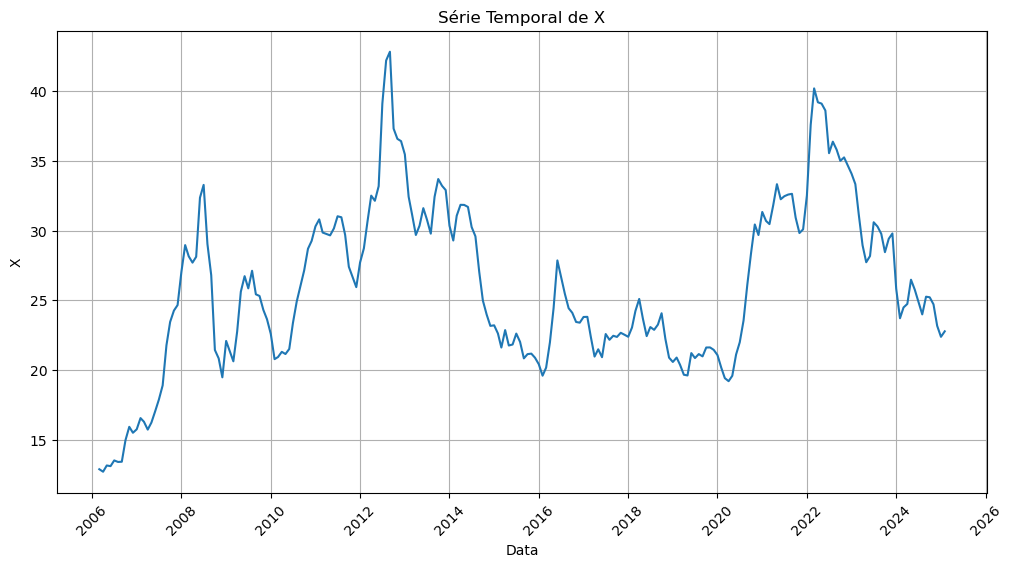

In [21]:
plot_time_series(df_usd, 'X')